<a href="https://colab.research.google.com/github/Davron030901/Scikit_learning/blob/main/PCA_Analysis_in_Python_Explained_(Scikit_Learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/2022baseball.csv

--2024-12-09 06:29:42--  https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/2022baseball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3946 (3.9K) [text/plain]
Saving to: ‘2022baseball.csv.6’

2022baseball.csv.6  100%[===================>]   3.85K  --.-KB/s    in 0s      

2024-12-09 06:29:42 (60.4 MB/s) - ‘2022baseball.csv.6’ saved [3946/3946]



In [ ]:
df = pd.read_csv('/content/2022baseball.csv')

In [ ]:
df.drop(columns=['Rk','Player','Pos','Pos.1','Awards','Player-additional'],inplace=True)

In [ ]:
df

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,OPS,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB
0,31.0,6.6,139,562,504,75,139,26,5,22,...,0.820,130.0,0.368,131.0,241,7,12,0,5,1
1,29.0,3.0,156,672,589,81,145,33,2,30,...,0.794,123.0,0.348,123.0,272,12,6,0,4,0
2,32.0,1.8,98,387,354,45,98,9,0,10,...,0.723,105.0,0.329,110.0,137,16,7,0,1,1
3,24.0,1.2,127,466,427,58,100,19,2,10,...,0.653,85.0,0.294,83.0,153,3,1,1,1,0
4,25.0,0.9,152,631,586,79,164,24,3,13,...,0.713,101.0,0.323,106.0,233,18,4,0,10,1
5,29.0,2.3,155,669,577,100,126,21,3,46,...,0.827,131.0,0.360,130.0,291,10,4,0,2,3
6,25.0,-0.5,117,357,325,41,80,12,2,6,...,0.648,84.0,0.287,80.0,114,7,3,0,6,0
7,30.0,0.1,136,558,524,56,138,27,0,13,...,0.694,96.0,0.312,96.0,204,15,3,0,2,0
8,29.0,2.5,99,426,370,63,106,28,1,18,...,0.877,146.0,0.377,144.0,190,13,3,0,7,9
9,32.0,-0.4,63,232,214,17,45,9,4,1,...,0.567,61.0,0.260,59.0,65,0,3,0,2,0


In [ ]:
df.isna().sum()

,0
Age,1
WAR,0
G,0
PA,0
AB,0
R,0
H,0
2B,0
3B,0
HR,0


In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
X=df.iloc[:,:27]

In [ ]:
y=df.iloc[:,27]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaleStandard = StandardScaler()

In [ ]:
X_train = scaleStandard.fit_transform(X_train)

In [ ]:
X_train

array([[ 4.95727244e-01,  3.95542583e-01,  1.79235001e+00,
         2.06358563e-01,  1.87708287e-01,  2.01199190e-01,
         1.71058631e-01,  3.01507185e-01,  1.42148170e-02,
         4.14085249e-01,  2.10502299e-01, -2.49309247e-01,
        -1.94370396e-01,  4.22971926e-01,  2.84110447e-01,
         3.08006545e-01,  5.19830930e-01,  7.16297020e-01,
         6.55985598e-01,  6.45588223e-01,  6.13102232e-01,
         6.35103292e-01,  2.46386464e-01,  1.55162527e-01,
         2.49701342e-01, -3.65854558e-01,  8.73953577e-02],
       [-7.29103619e-01, -2.19535597e-01, -8.15372339e-01,
        -3.43339132e-01, -3.48385373e-01, -3.39957252e-01,
        -3.42563891e-01, -3.67157943e-01, -3.41155608e-01,
        -3.16357100e-01, -3.22962431e-01, -2.98385870e-01,
        -3.74342984e-01, -2.90631016e-01, -3.32527983e-01,
         1.43041947e+00,  2.20519067e+00,  8.14459743e-01,
         1.43109963e+00,  1.51241799e+00,  1.53767351e+00,
         1.45301828e+00, -3.38759054e-01, -3.73800633e-

In [ ]:
df.columns

Index(['Age', 'WAR', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'rOBA', 'Rbat+',
       'TB', 'GIDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')

In [ ]:
X_train=pd.DataFrame(X_train,columns=df.columns[:27])

In [ ]:
X_train.head(10)

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF
0,0.495727,0.395543,1.792350,0.206359,0.187708,0.201199,0.171059,0.301507,0.014215,0.414085,...,0.716297,0.655986,0.645588,0.613102,0.635103,0.246386,0.155163,0.249701,-0.365855,0.087395
1,-0.729104,-0.219536,-0.815372,-0.343339,-0.348385,-0.339957,-0.342564,-0.367158,-0.341156,-0.316357,...,0.814460,1.431100,1.512418,1.537674,1.453018,-0.338759,-0.373801,-0.245738,-0.365855,-0.372580
2,0.904004,-0.290506,1.425065,0.109052,0.126360,0.027752,0.145005,0.179932,-0.341156,-0.014105,...,0.204449,0.230099,0.234985,0.259011,0.273075,0.094517,0.287403,-0.047562,-0.365855,-0.142592
3,-1.545658,-0.456104,-0.741915,-0.324561,-0.324790,-0.333019,-0.346286,-0.346895,-0.341156,-0.341545,...,-1.457306,-1.294576,-1.270562,-1.275384,-1.242079,-0.345459,-0.373801,-0.344826,0.465633,-0.372580
4,0.087450,-0.290506,-0.117531,-0.225547,-0.224744,-0.305268,-0.234629,-0.306370,-0.341156,-0.265982,...,-0.307400,-0.114870,-0.084374,-0.104916,-0.062136,-0.253891,-0.329720,-0.344826,0.465633,-0.372580
5,0.904004,-0.314163,-1.054107,-0.367239,-0.368206,-0.360771,-0.368617,-0.367158,-0.341156,-0.341545,...,-0.060175,-0.029377,-0.024670,-0.009836,-0.008999,-0.361093,-0.373801,-0.344826,-0.365855,-0.372580
6,-1.137381,-0.432447,1.076145,-0.062515,-0.061462,-0.076317,-0.070865,-0.124007,0.014215,-0.190419,...,-0.061993,0.034191,0.052494,0.013114,0.058540,-0.106488,-0.065239,-0.047562,-0.365855,0.317383
7,1.720558,-0.314163,-1.054107,-0.367239,-0.368206,-0.360771,-0.368617,-0.367158,-0.341156,-0.341545,...,-0.060175,-0.029377,-0.024670,-0.009836,-0.008999,-0.361093,-0.373801,-0.344826,-0.365855,-0.372580
8,0.495727,-0.314163,-0.650094,-0.333096,-0.333284,-0.305268,-0.346286,-0.346895,-0.341156,-0.341545,...,-1.197876,-0.962384,-0.920788,-0.813098,-0.866642,-0.345459,-0.373801,-0.344826,-0.365855,-0.372580
9,-0.320827,-0.314163,-1.054107,-0.366385,-0.367262,-0.360771,-0.368617,-0.367158,-0.341156,-0.341545,...,-2.523073,-2.725556,-2.745693,-2.809779,-2.837683,-0.361093,-0.373801,-0.344826,-0.365855,-0.372580


In [ ]:
X_train.describe().round(3)

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF
count,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,...,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000
mean,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,...,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000
std,1.021,1.021,1.021,1.021,1.021,1.021,1.021,1.021,1.021,1.021,...,1.021,1.021,1.021,1.021,1.021,1.021,1.021,1.021,1.021,1.021
min,-1.546,-0.456,-1.054,-0.367,-0.368,-0.361,-0.369,-0.367,-0.341,-0.342,...,-2.523,-2.726,-2.746,-2.810,-2.838,-0.361,-0.374,-0.345,-0.366,-0.373
25%,-0.729,-0.314,-0.815,-0.343,-0.348,-0.340,-0.346,-0.367,-0.341,-0.342,...,-0.062,-0.029,-0.025,-0.010,-0.009,-0.345,-0.374,-0.345,-0.366,-0.373
50%,-0.057,-0.291,-0.320,-0.264,-0.268,-0.271,-0.264,-0.286,-0.341,-0.266,...,0.127,0.060,0.068,0.121,0.112,-0.254,-0.330,-0.246,-0.366,-0.373
75%,0.904,-0.101,0.746,-0.037,-0.034,-0.049,-0.004,-0.124,-0.163,-0.090,...,0.716,0.656,0.630,0.515,0.541,-0.055,-0.065,-0.048,-0.366,-0.143
max,1.721,4.796,1.903,4.820,4.819,4.822,4.812,4.800,4.812,4.822,...,1.635,1.431,1.512,1.538,1.453,4.820,4.740,4.808,4.623,4.687


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca1=PCA()

In [ ]:
X_pca1=pca1.fit_transform(X_train)

In [ ]:
pca1.explained_variance_ratio_.round(3)

array([0.675, 0.246, 0.038, 0.025, 0.006, 0.004, 0.002, 0.002, 0.001,
       0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

#Prasad Ostwal Github

In [ ]:
import matplotlib.pyplot as plt

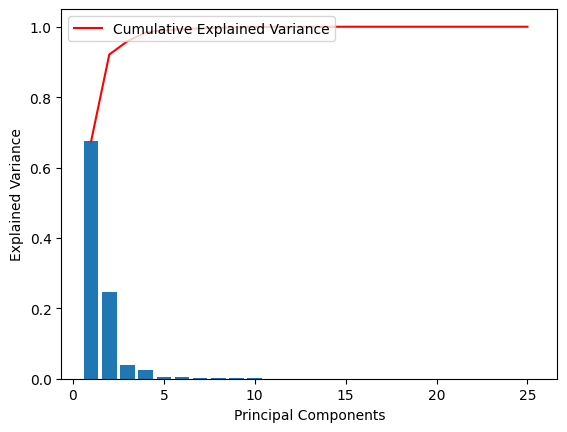

In [ ]:
plt.bar(range(1,len(pca1.explained_variance_ratio_)+1),pca1.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.plot(range(1,len(pca1.explained_variance_ratio_)+1),np.cumsum(pca1.explained_variance_ratio_),color='red',label='Cumulative Explained Variance')
plt.legend(loc='upper left')

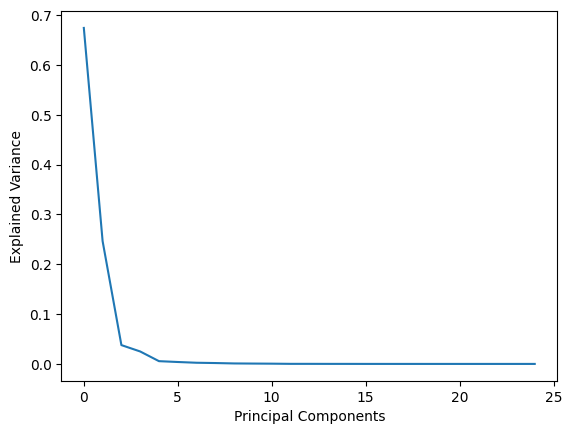

In [ ]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
pca2=PCA(0.95)

In [ ]:
X_pca2=pca2.fit_transform(X_train)

In [ ]:
X_pca2.shape

(25, 3)

In [ ]:
pca2.explained_variance_ratio_

array([0.67453539, 0.24649892, 0.03779178])

In [ ]:
pca2c=PCA(n_components=2)

In [ ]:
X_pca2c=pca2c.fit_transform(X_train)

In [ ]:
colormap=plt.cm.get_cmap('coolwarm')

<ipython-input-188-043e1571b9f5>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=plt.cm.get_cmap('coolwarm')


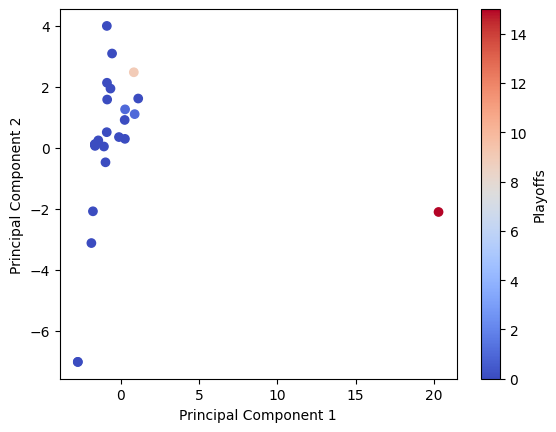

In [ ]:
plt.figure()
scatter=plt.scatter(X_pca2c[:,0],X_pca2c[:,1],c=y_train,cmap=colormap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter,label='Playoffs')
plt.show()

In [ ]:
pca3c=PCA(n_components=3)

In [ ]:
X_pca3c=pca3c.fit_transform(X_train)

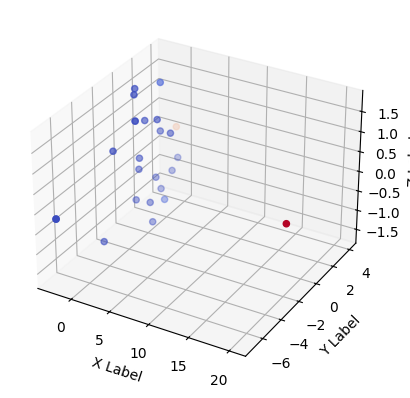

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X_pca3c[:,0],X_pca3c[:,1],X_pca3c[:,2],c=y_train,cmap=colormap)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.colorbar(scatter,label='Playoffs')
plt.show()